## Pakiety/Funkcje

In [294]:
library(psych)
library(caret)
library(klaR)
library(MASS)
library(vegan)
library(car)
library(caret)
library(mclust)
library(mixtools)
library(bestNormalize)
library(fda)

In [252]:
# Step 3: Normalize numeric columns (Min-Max normalization)
normalize <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}


## Dane

Tu zmienić dane, potem wszystko powinno działać

In [300]:
Dane_org <- read.csv(file.choose())
Dane_org$round_winner <- as.factor(Dane_org$round_winner)

In [301]:
All_data_ind <- sample(1:100000, 20000, replace = FALSE)
Train_ind = All_data_ind[1:15000]
test_ind = All_data_ind[1501:20000]
Dane <- Dane_org[Train_ind, c(1:15,97)]
Dane_pred <- Dane_org[test_ind, c(1:15,97)]

In [302]:
Dane_norm = Dane
Dane_pred_norm = Dane_pred
# Apply normalization only to numeric columns
Dane_norm[numeric_columns] <- lapply(Dane[numeric_columns], normalize)
Dane_pred_norm[numeric_columns] <- lapply(Dane_pred[numeric_columns], normalize)

In [303]:
names(Dane)

[1] "time_left"        "ct_score"         "t_score"          "map"             
 [5] "bomb_planted"     "ct_health"        "t_health"         "ct_armor"        
 [9] "t_armor"          "ct_money"         "t_money"          "ct_helmets"      
[13] "t_helmets"        "ct_defuse_kits"   "ct_players_alive" "round_winner"

In [253]:
head(Dane)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,round_winner
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
56753,71.25,9,14,de_inferno,False,473,121,492,0,6050,4400,4,0,4,5,CT
1450,74.96,9,8,de_mirage,False,269,445,0,467,7450,14700,0,5,0,3,T
11029,69.65,14,12,de_overpass,False,500,479,489,478,8200,10850,3,5,4,5,CT
93796,21.55,2,3,de_vertigo,True,180,100,200,0,3800,2550,2,0,2,2,CT
59926,74.95,0,3,de_dust2,False,500,500,500,488,500,5100,1,5,0,5,CT
38170,175.00,12,7,de_vertigo,False,500,500,398,0,13350,18900,4,0,2,5,CT


- time_left - czas do końca rundy w momencie jej zakończenia 
- ct_score - wynik po stronie ct w
- t_score - wynik po stronie t
- map - mapa (str)
- bomb_planted - podłożona/nie w trakcie rundy
- ct_health - całkowite hp po stronie ct
- t_health - całkowite hp po stronnie t
- ct_armor - całkowita wartość ochrony po stronie ct
- t_armor - całkowita wartość ochrony po stronie t
- ct_money - całkowita ilość pieniędzy po stronie ct
- t_money - całkowita ilość pieniędzy po stronie t
- ct_helmet - całkowita liczba hełmów po stronie ct
- t_helmet - całkowita liczba hełmów po stronie t
- ct_defuse_kits - całkowita liczba tzw. defuse kits po stronie ct
- ct_players_alive - całkowita liczba żywych graczy po stronie ct
- round_winner - wynik rundy (T/CT)

## Wykresy

Te zmienne ma sens rozpatrywać jako ciągłe

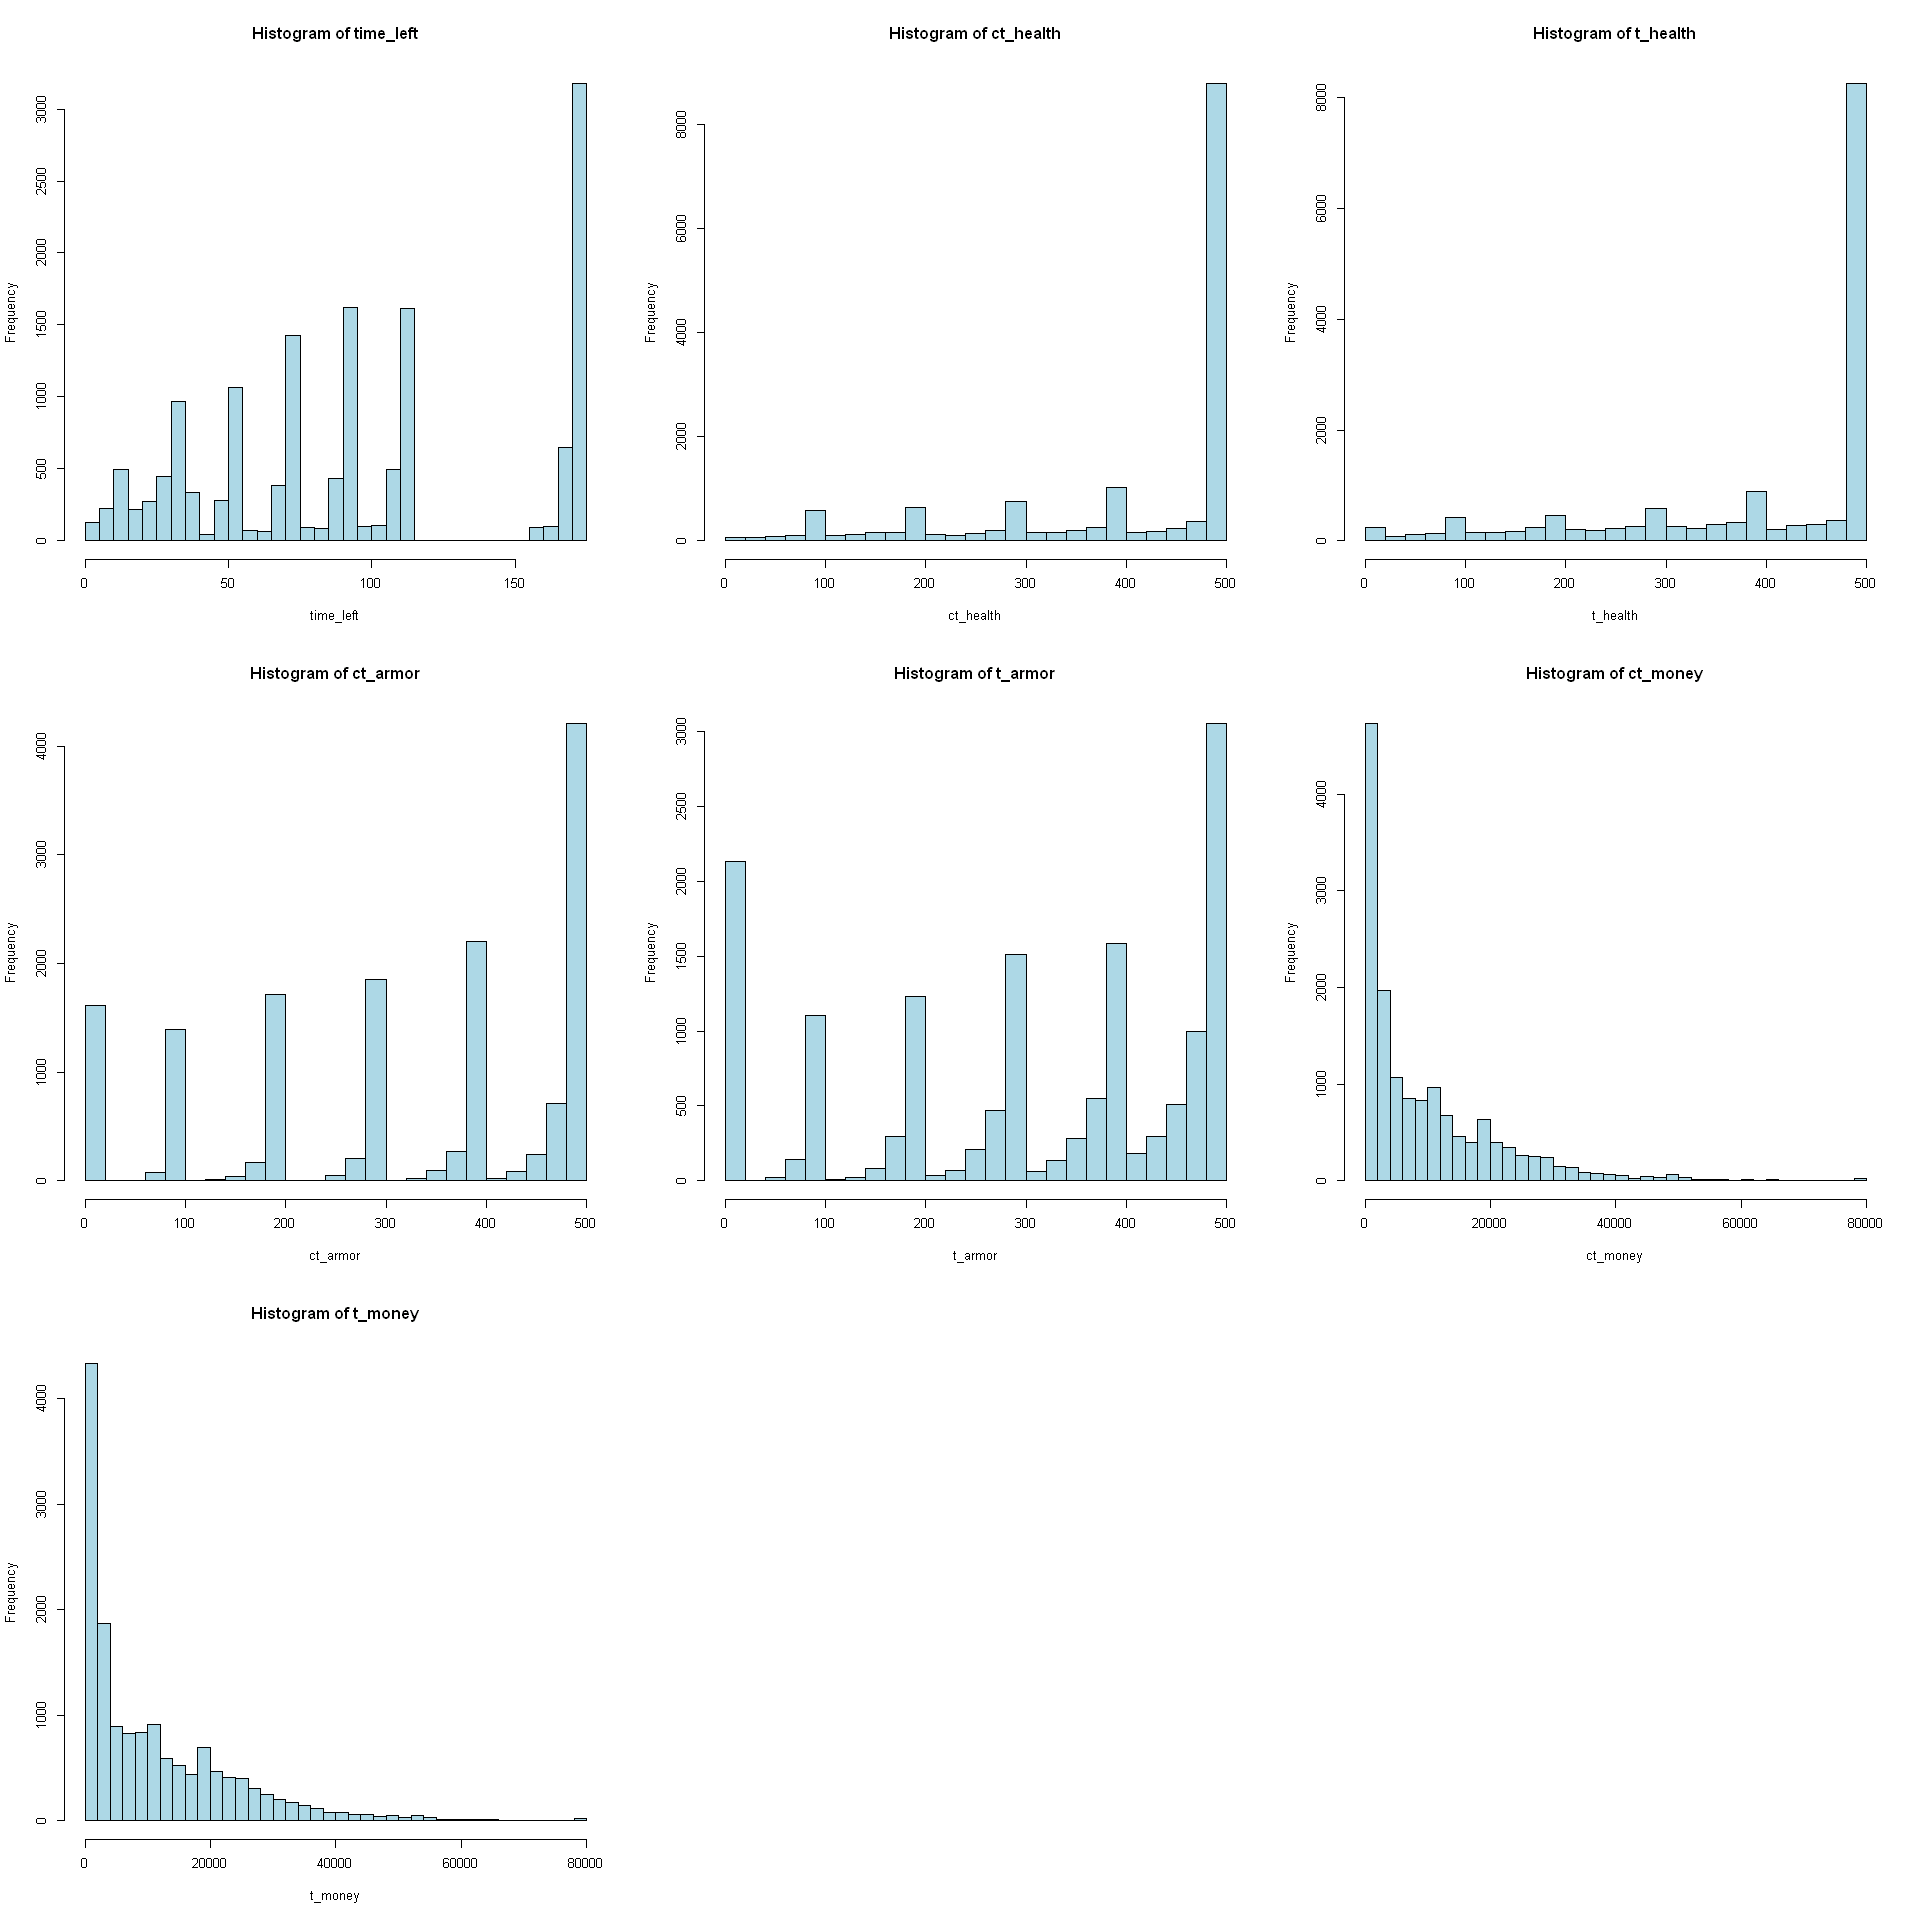

In [258]:
num_cols <- sapply(Dane, is.numeric)
par(mfrow = c(3, 3))
numeric_columns <- names(Dane)[num_cols]
for (col in numeric_columns[c(1,4:9)]) {
  hist(Dane[[col]], main = paste("Histogram of", col), xlab = col, col = "lightblue", breaks = 30,border = "black")
}

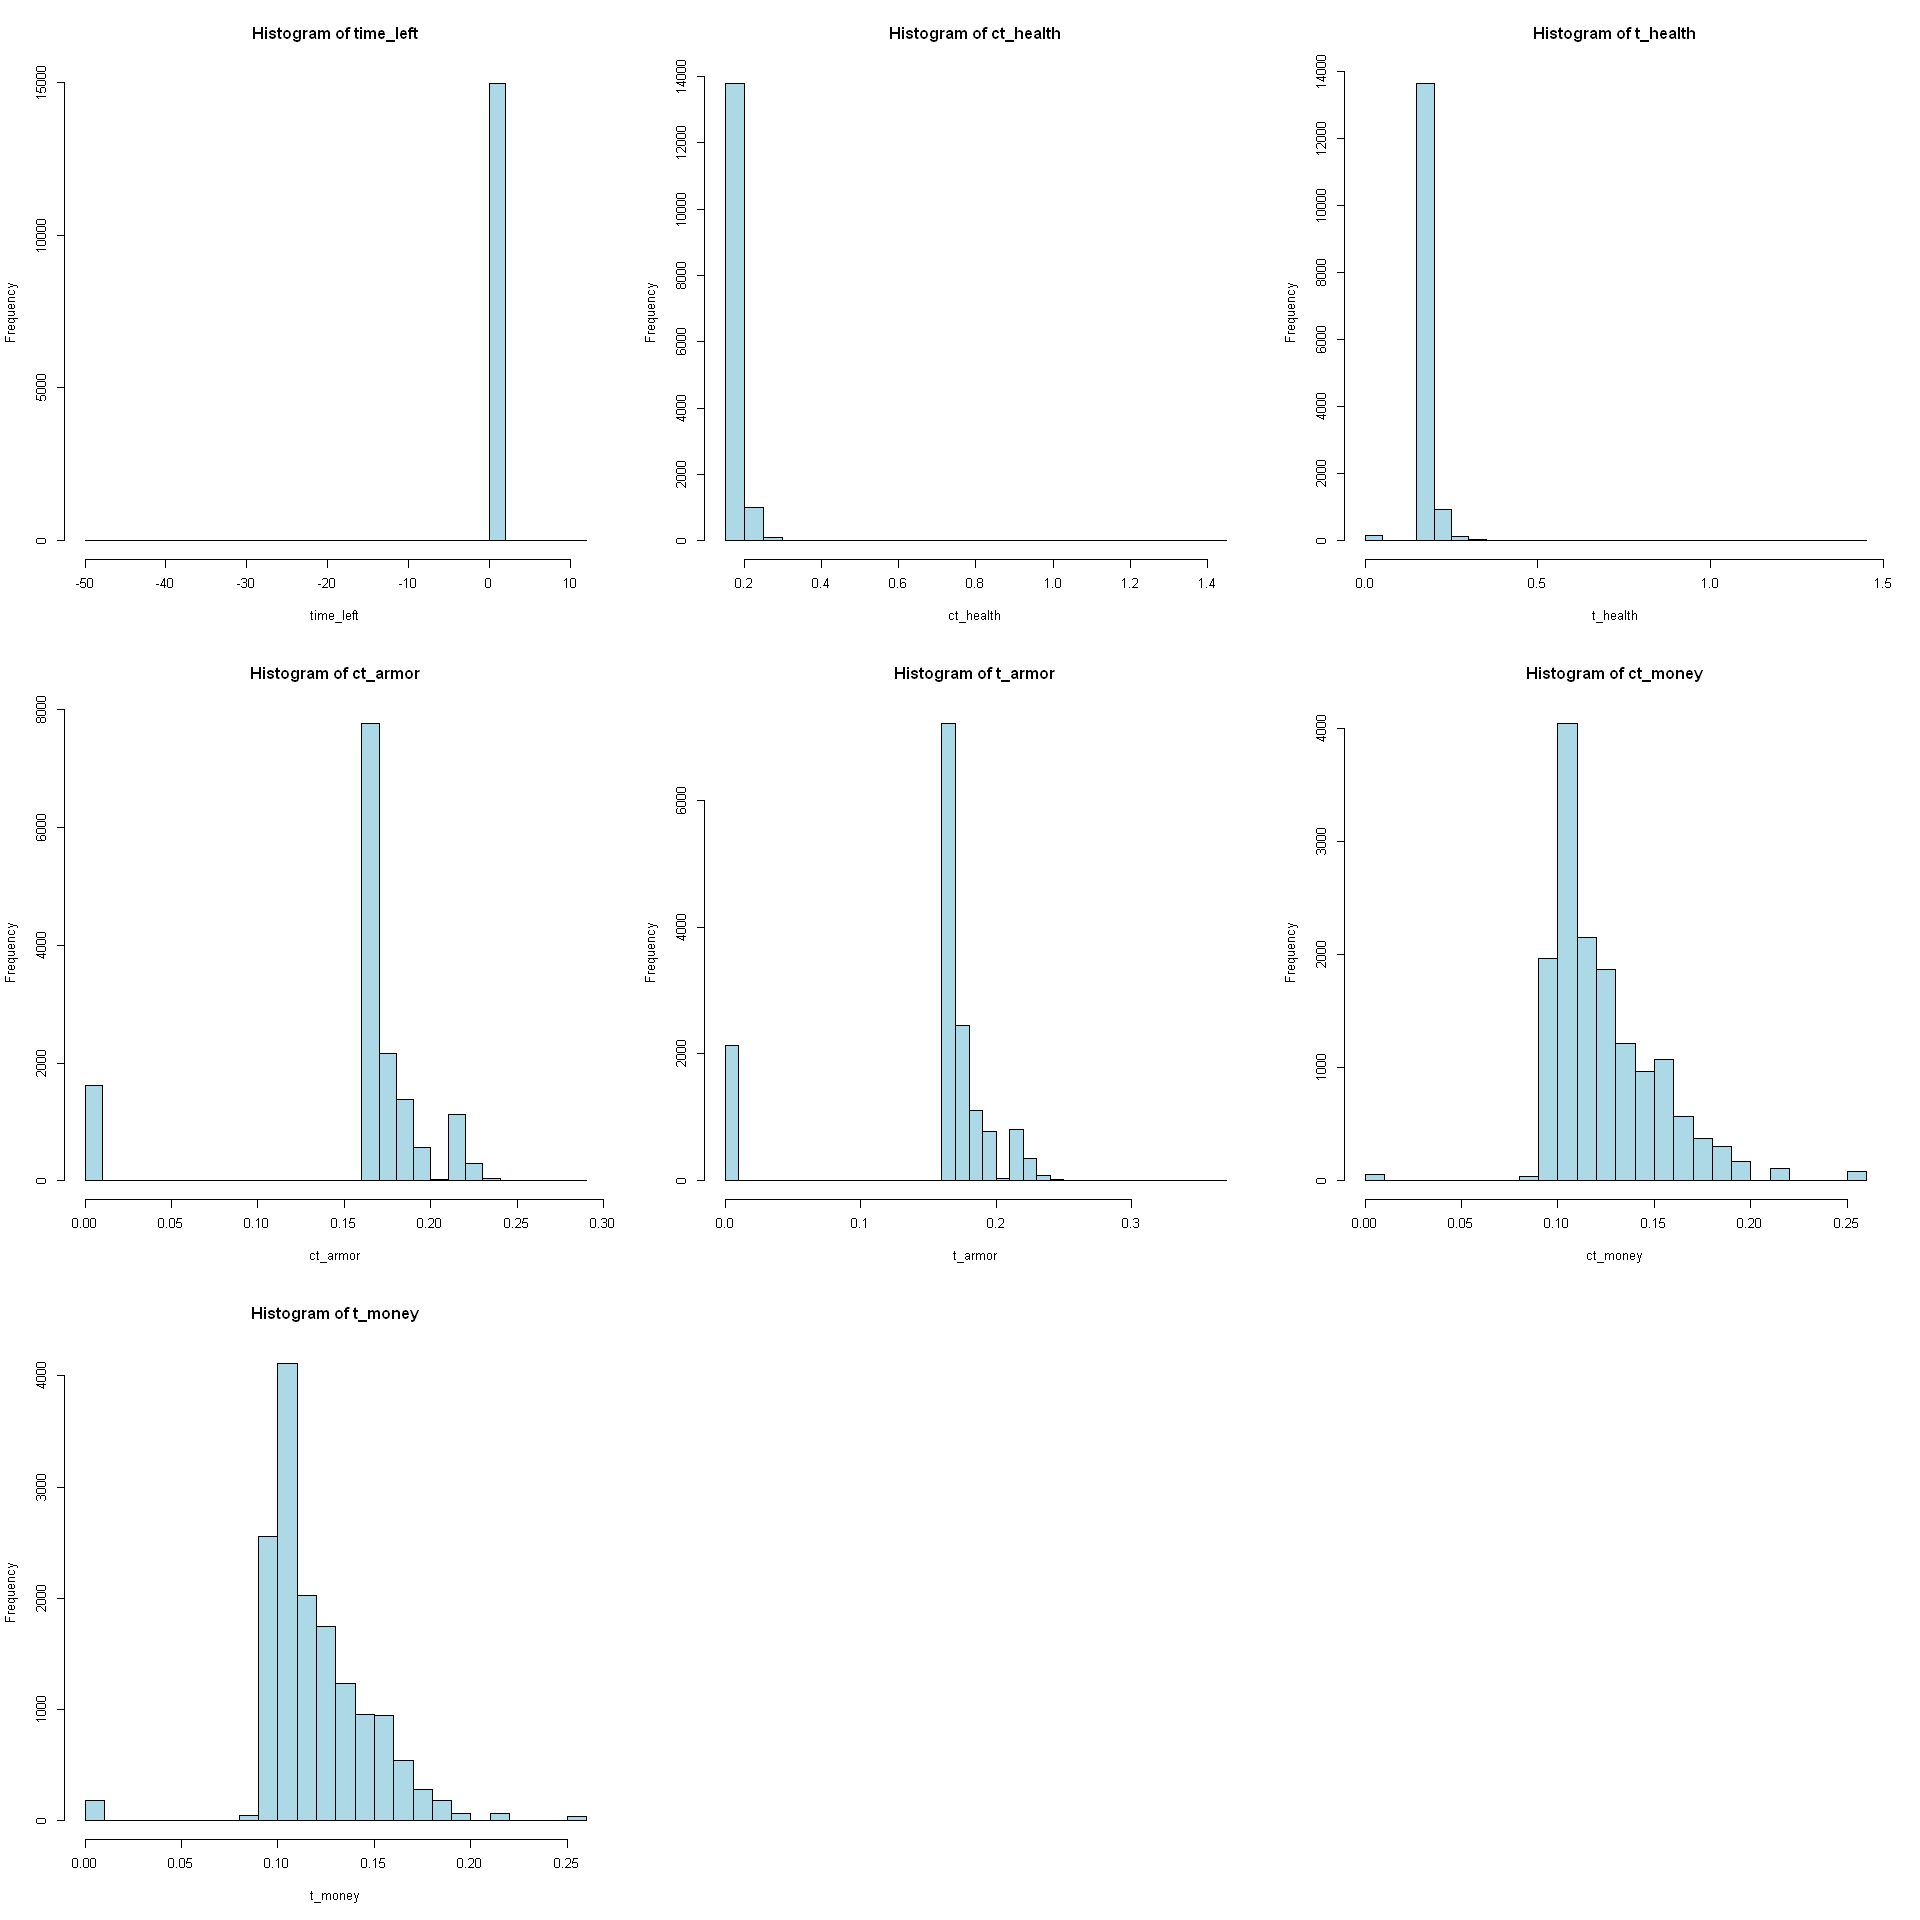

In [289]:
Dane_norm_log = Dane_norm
Dane_norm_log[numeric_columns[c(1,4:9)]] <- lapply(log(Dane[numeric_columns[c(1,4:9)]]), normalize)

num_cols <- sapply(Dane, is.numeric)
par(mfrow = c(3, 3))
numeric_columns <- names(Dane)[num_cols]
for (col in numeric_columns[c(1,4:9)]) {
  hist(1/(log(Dane[[col]])), main = paste("Histogram of", col), xlab = col, col = "lightblue", breaks = 30,border = "black")
}

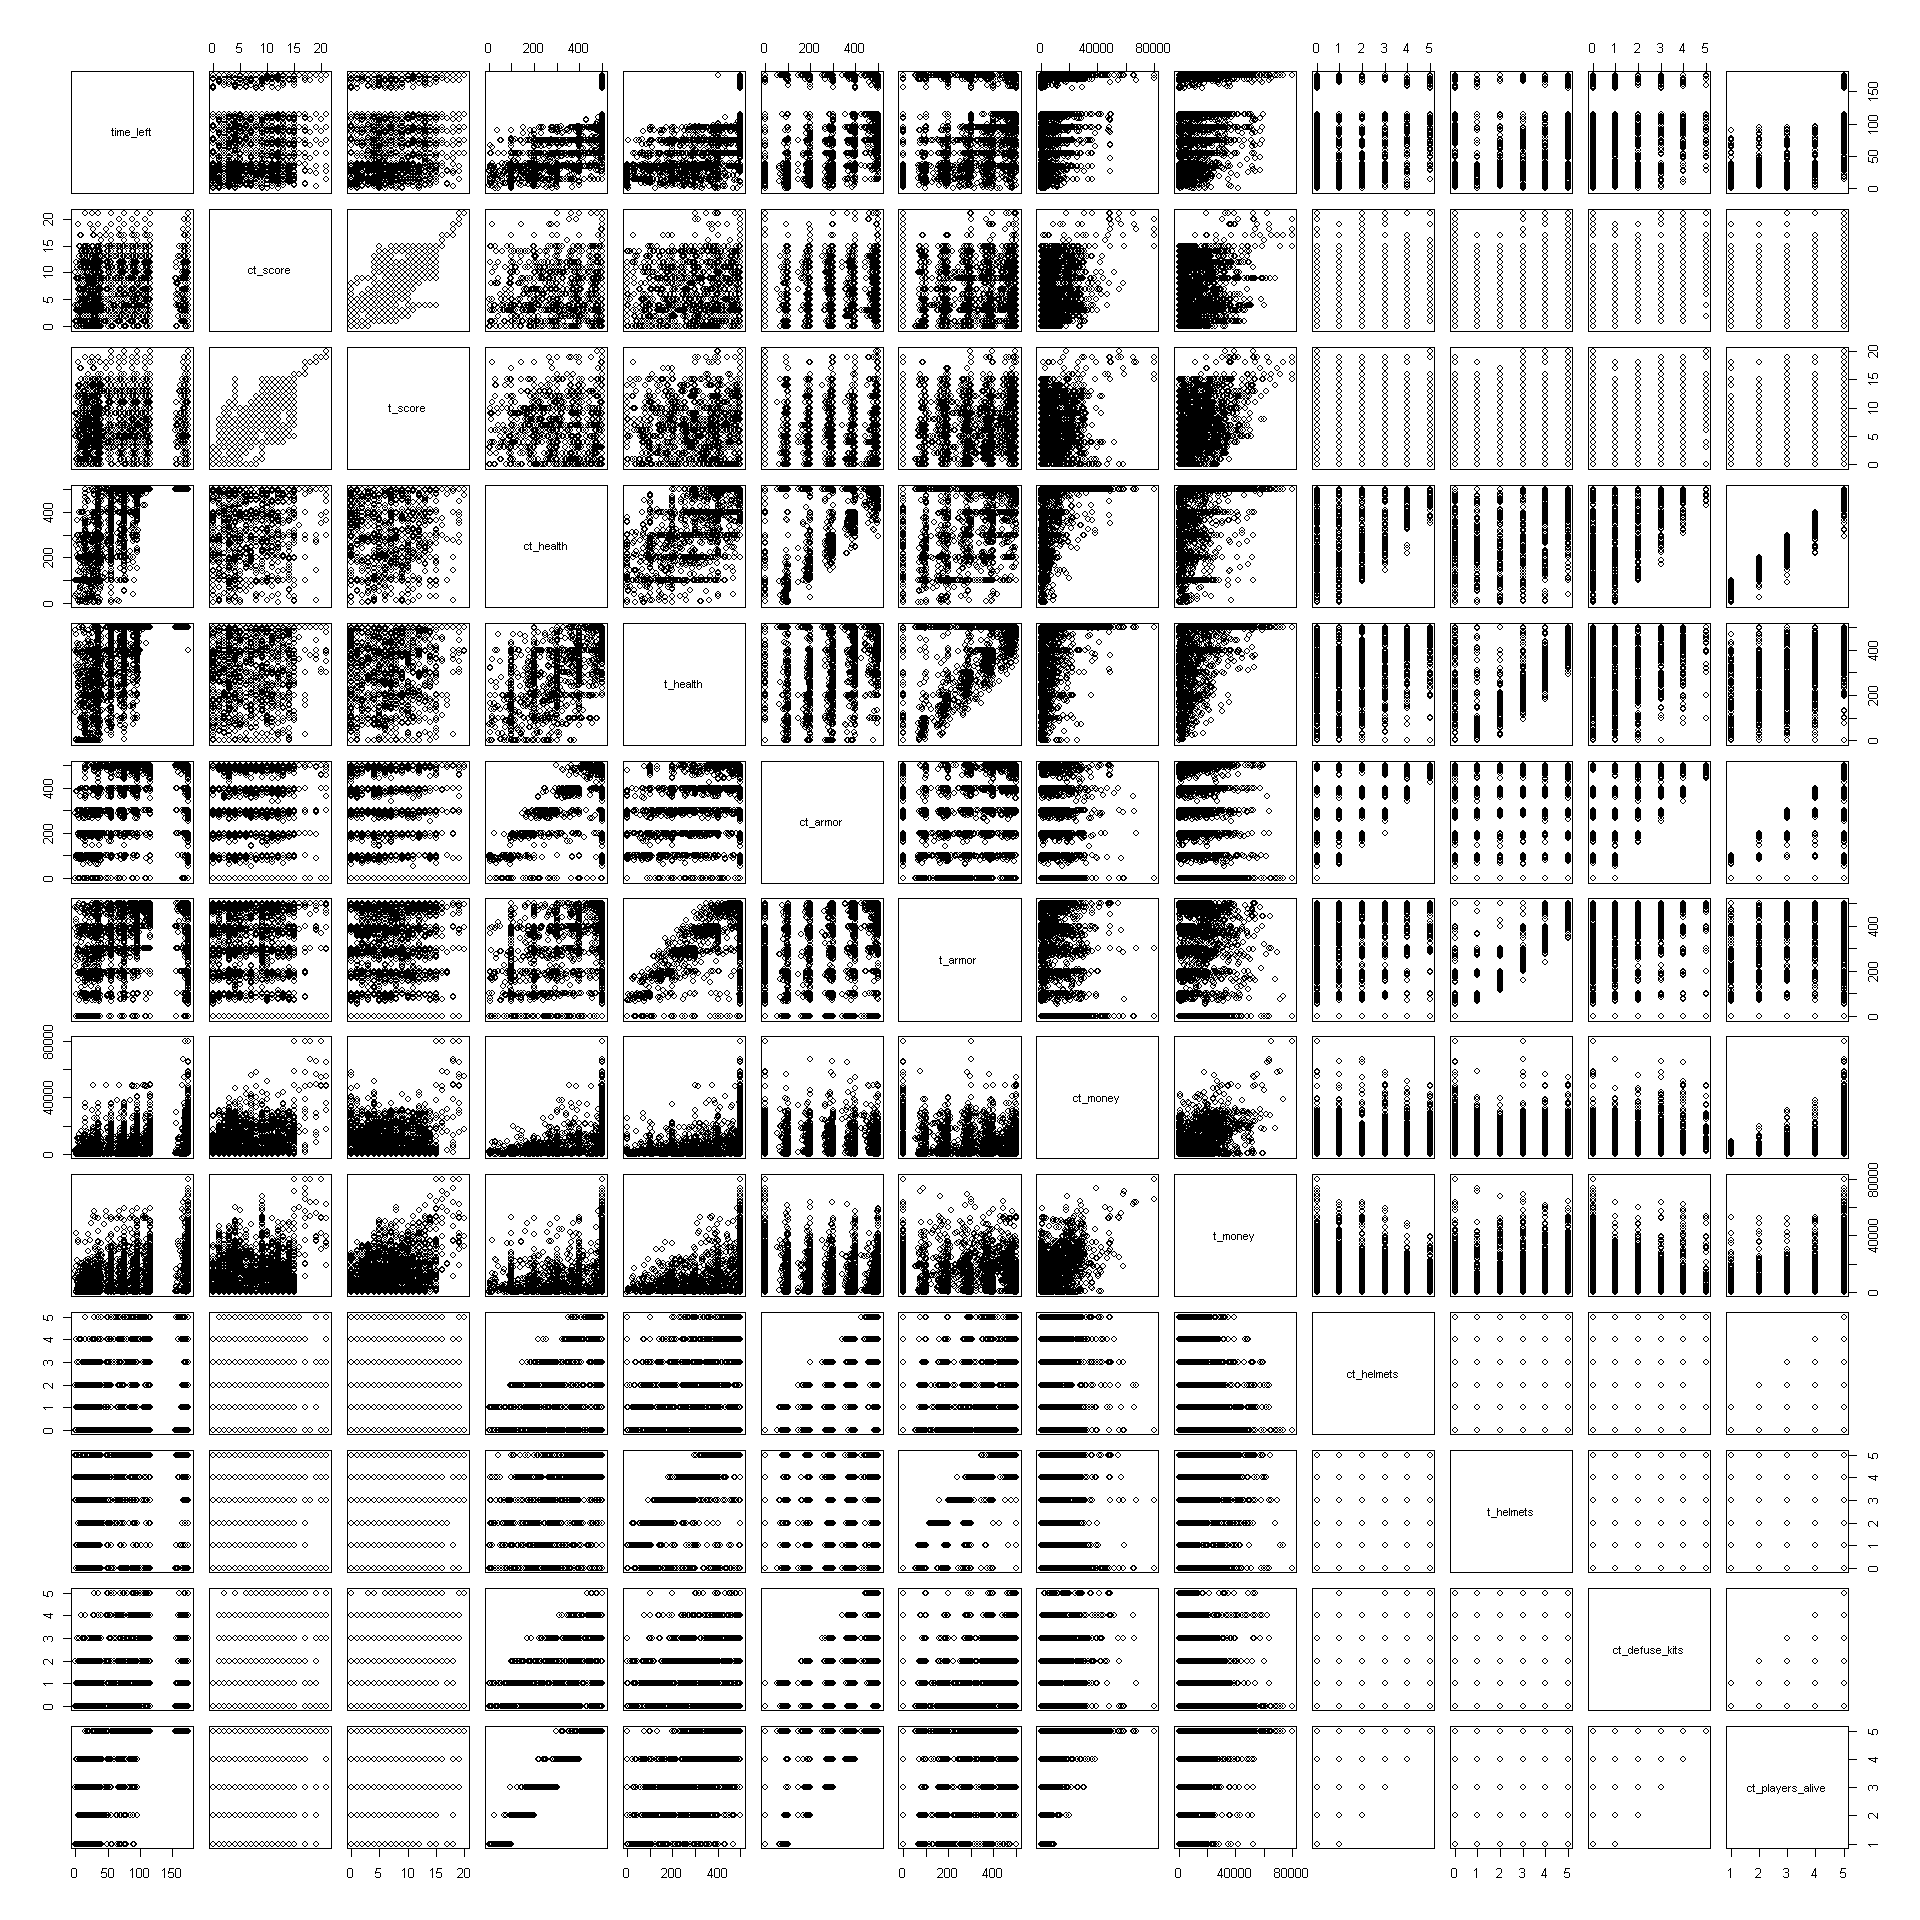

In [67]:
options(repr.plot.width=16, repr.plot.height=16) 

par(pin=c(10, 12))
pairs(Dane[,-c(4,5,16)])
pairs(Dane_norm[,-c(4,5,16)])

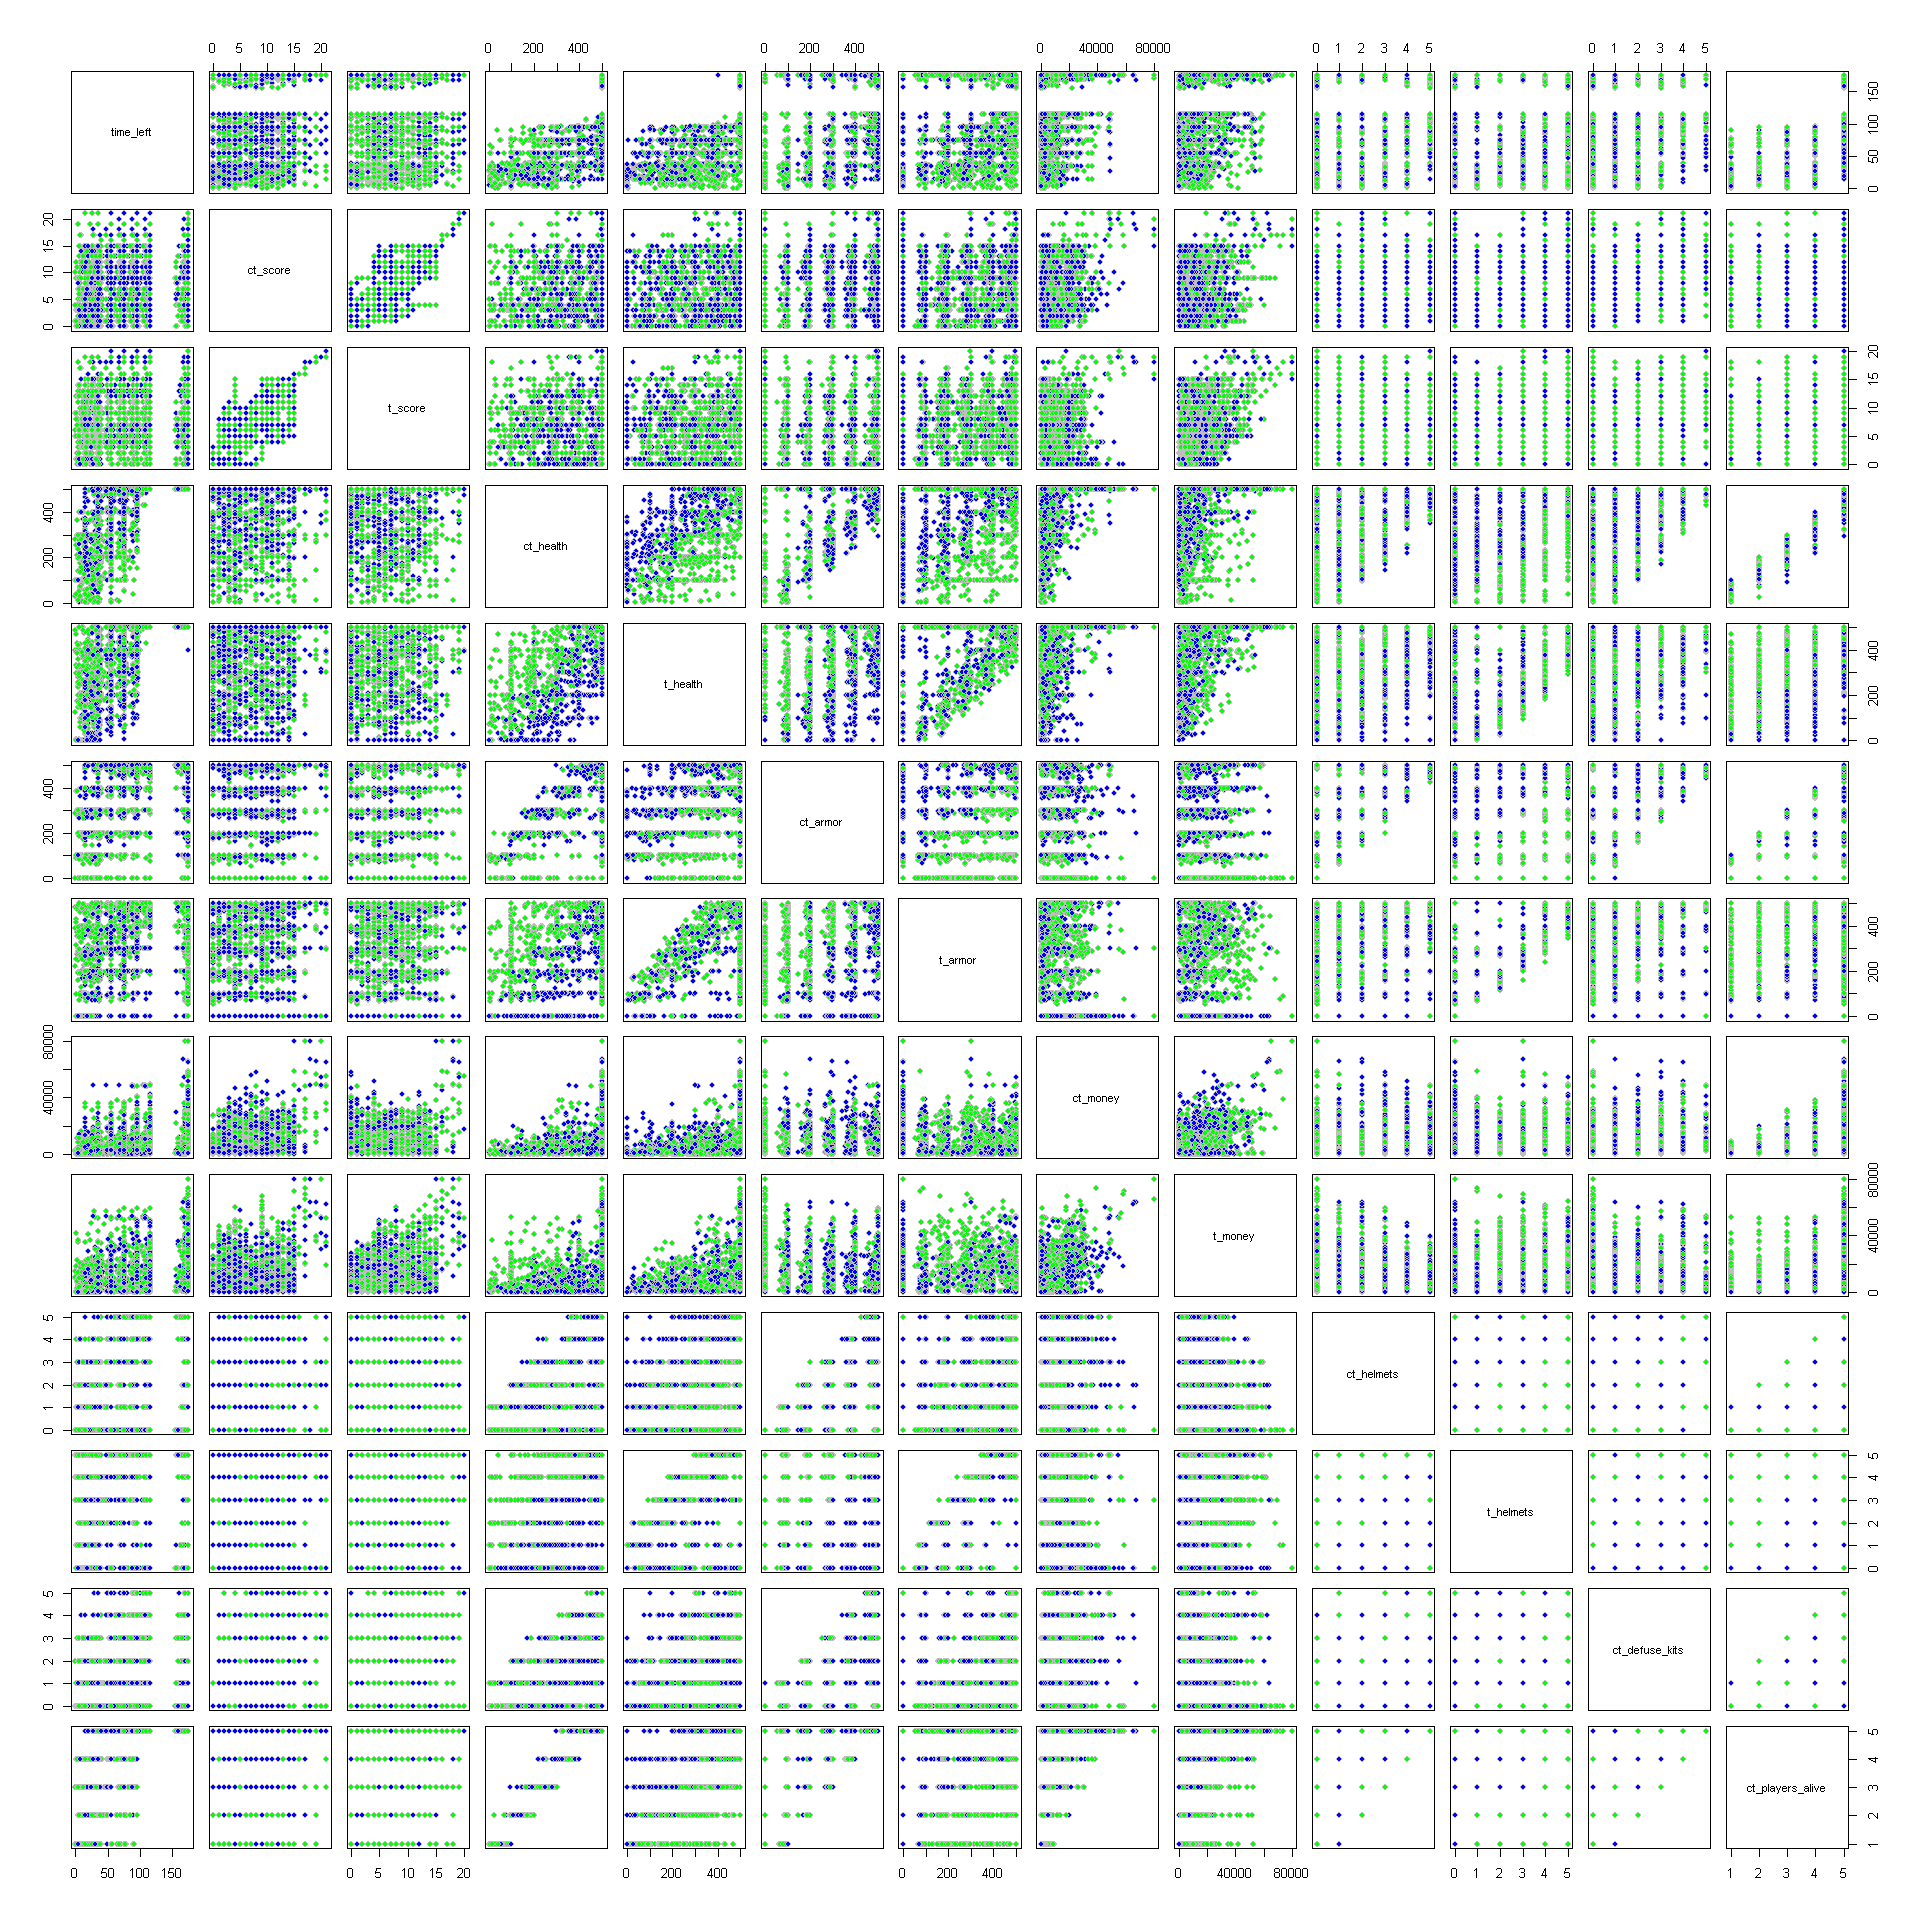

In [68]:
options(repr.plot.width=16, repr.plot.height=16) 
lookup <- c(CT = 'blue', T = 'green')
col.ind <- lookup[Dane$round_winner]
pairs(Dane[,-c(4,5,16)], pch = 21, col = "gray", bg = col.ind)

## Korelacje

In [54]:
cor(Dane[,-c(4,5,16)])

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive
time_left,1.000000000,0.02367271,0.0018295682,0.6821893363,0.66910844,-0.09614780,-0.17381735,0.4503102,0.36200312,-0.08384957,-0.20358606,-0.06110268,0.646588181
ct_score,0.023672710,1.00000000,0.7172384692,0.0453148613,0.05013854,0.06245756,0.07896258,0.1801165,0.20605233,0.13370648,0.09277282,0.20947453,0.041819660
t_score,0.001829568,0.71723847,1.0000000000,0.0004353911,0.02424437,0.01077643,0.13217582,0.1075718,0.38484137,-0.05132843,0.18300309,0.12484897,-0.003253256
ct_health,0.682189336,0.04531486,0.0004353911,1.0000000000,0.75837478,0.40555419,0.17574396,0.3177553,0.23288834,0.22581937,0.10362843,0.22033240,0.976737155
t_health,0.669108436,0.05013854,0.0242443677,0.7583747798,1.00000000,0.19333104,0.37213046,0.2897903,0.32095844,0.09194933,0.28160690,0.10103389,0.710918691
ct_armor,-0.096147801,0.06245756,0.0107764318,0.4055541860,0.19333104,1.00000000,0.34250867,-0.1575548,-0.14509892,0.63435564,0.27439587,0.58587762,0.435340160
t_armor,-0.173817352,0.07896258,0.1321758239,0.1757439637,0.37213046,0.34250867,1.00000000,-0.1810374,-0.02432349,0.15042453,0.89779042,0.17981403,0.158074924
ct_money,0.450310193,0.18011654,0.1075717588,0.3177552665,0.28979030,-0.15755484,-0.18103738,1.0000000,0.48608907,0.13076770,-0.10979378,0.20869085,0.311189733
t_money,0.362003118,0.20605233,0.3848413702,0.2328883392,0.32095844,-0.14509892,-0.02432349,0.4860891,1.00000000,-0.19231203,0.12914260,-0.10269040,0.212115273
ct_helmets,-0.083849572,0.13370648,-0.0513284330,0.2258193716,0.09194933,0.63435564,0.15042453,0.1307677,-0.19231203,1.00000000,0.13392786,0.71329839,0.239358735


## Analiza dyskryminacyjna

### LDA

In [242]:
lda.fit<- lda(round_winner ~ ., data = Dane_norm)

In [243]:
lda.fit

Call:
lda(round_winner ~ ., data = Dane_norm)

Prior probabilities of groups:
       CT         T 
0.4844667 0.5155333 

Group means:
   time_left  ct_score   t_score mapde_dust2 mapde_inferno mapde_mirage
CT 0.5760836 0.2224740 0.2109837   0.1747626     0.1714600    0.1424247
T  0.5327827 0.2023956 0.2176023   0.1960429     0.2000517    0.1447045
   mapde_nuke mapde_overpass mapde_train mapde_vertigo bomb_plantedTrue
CT  0.1579744      0.1341682   0.1238475    0.09302326       0.05050227
T   0.1291866      0.1294452   0.1039700    0.09621104       0.17729212
   ct_health  t_health  ct_armor   t_armor  ct_money   t_money ct_helmets
CT 0.8739946 0.7748331 0.7509421 0.4961770 0.1420579 0.1258545  0.5349388
T  0.7693859 0.8244756 0.5171344 0.6942214 0.1057302 0.1548701  0.3030648
   t_helmets ct_defuse_kits ct_players_alive
CT 0.4388606      0.4233659        0.8835489
T  0.6725721      0.2335704        0.7491594

Coefficients of linear discriminants:
                         LD1
time_left

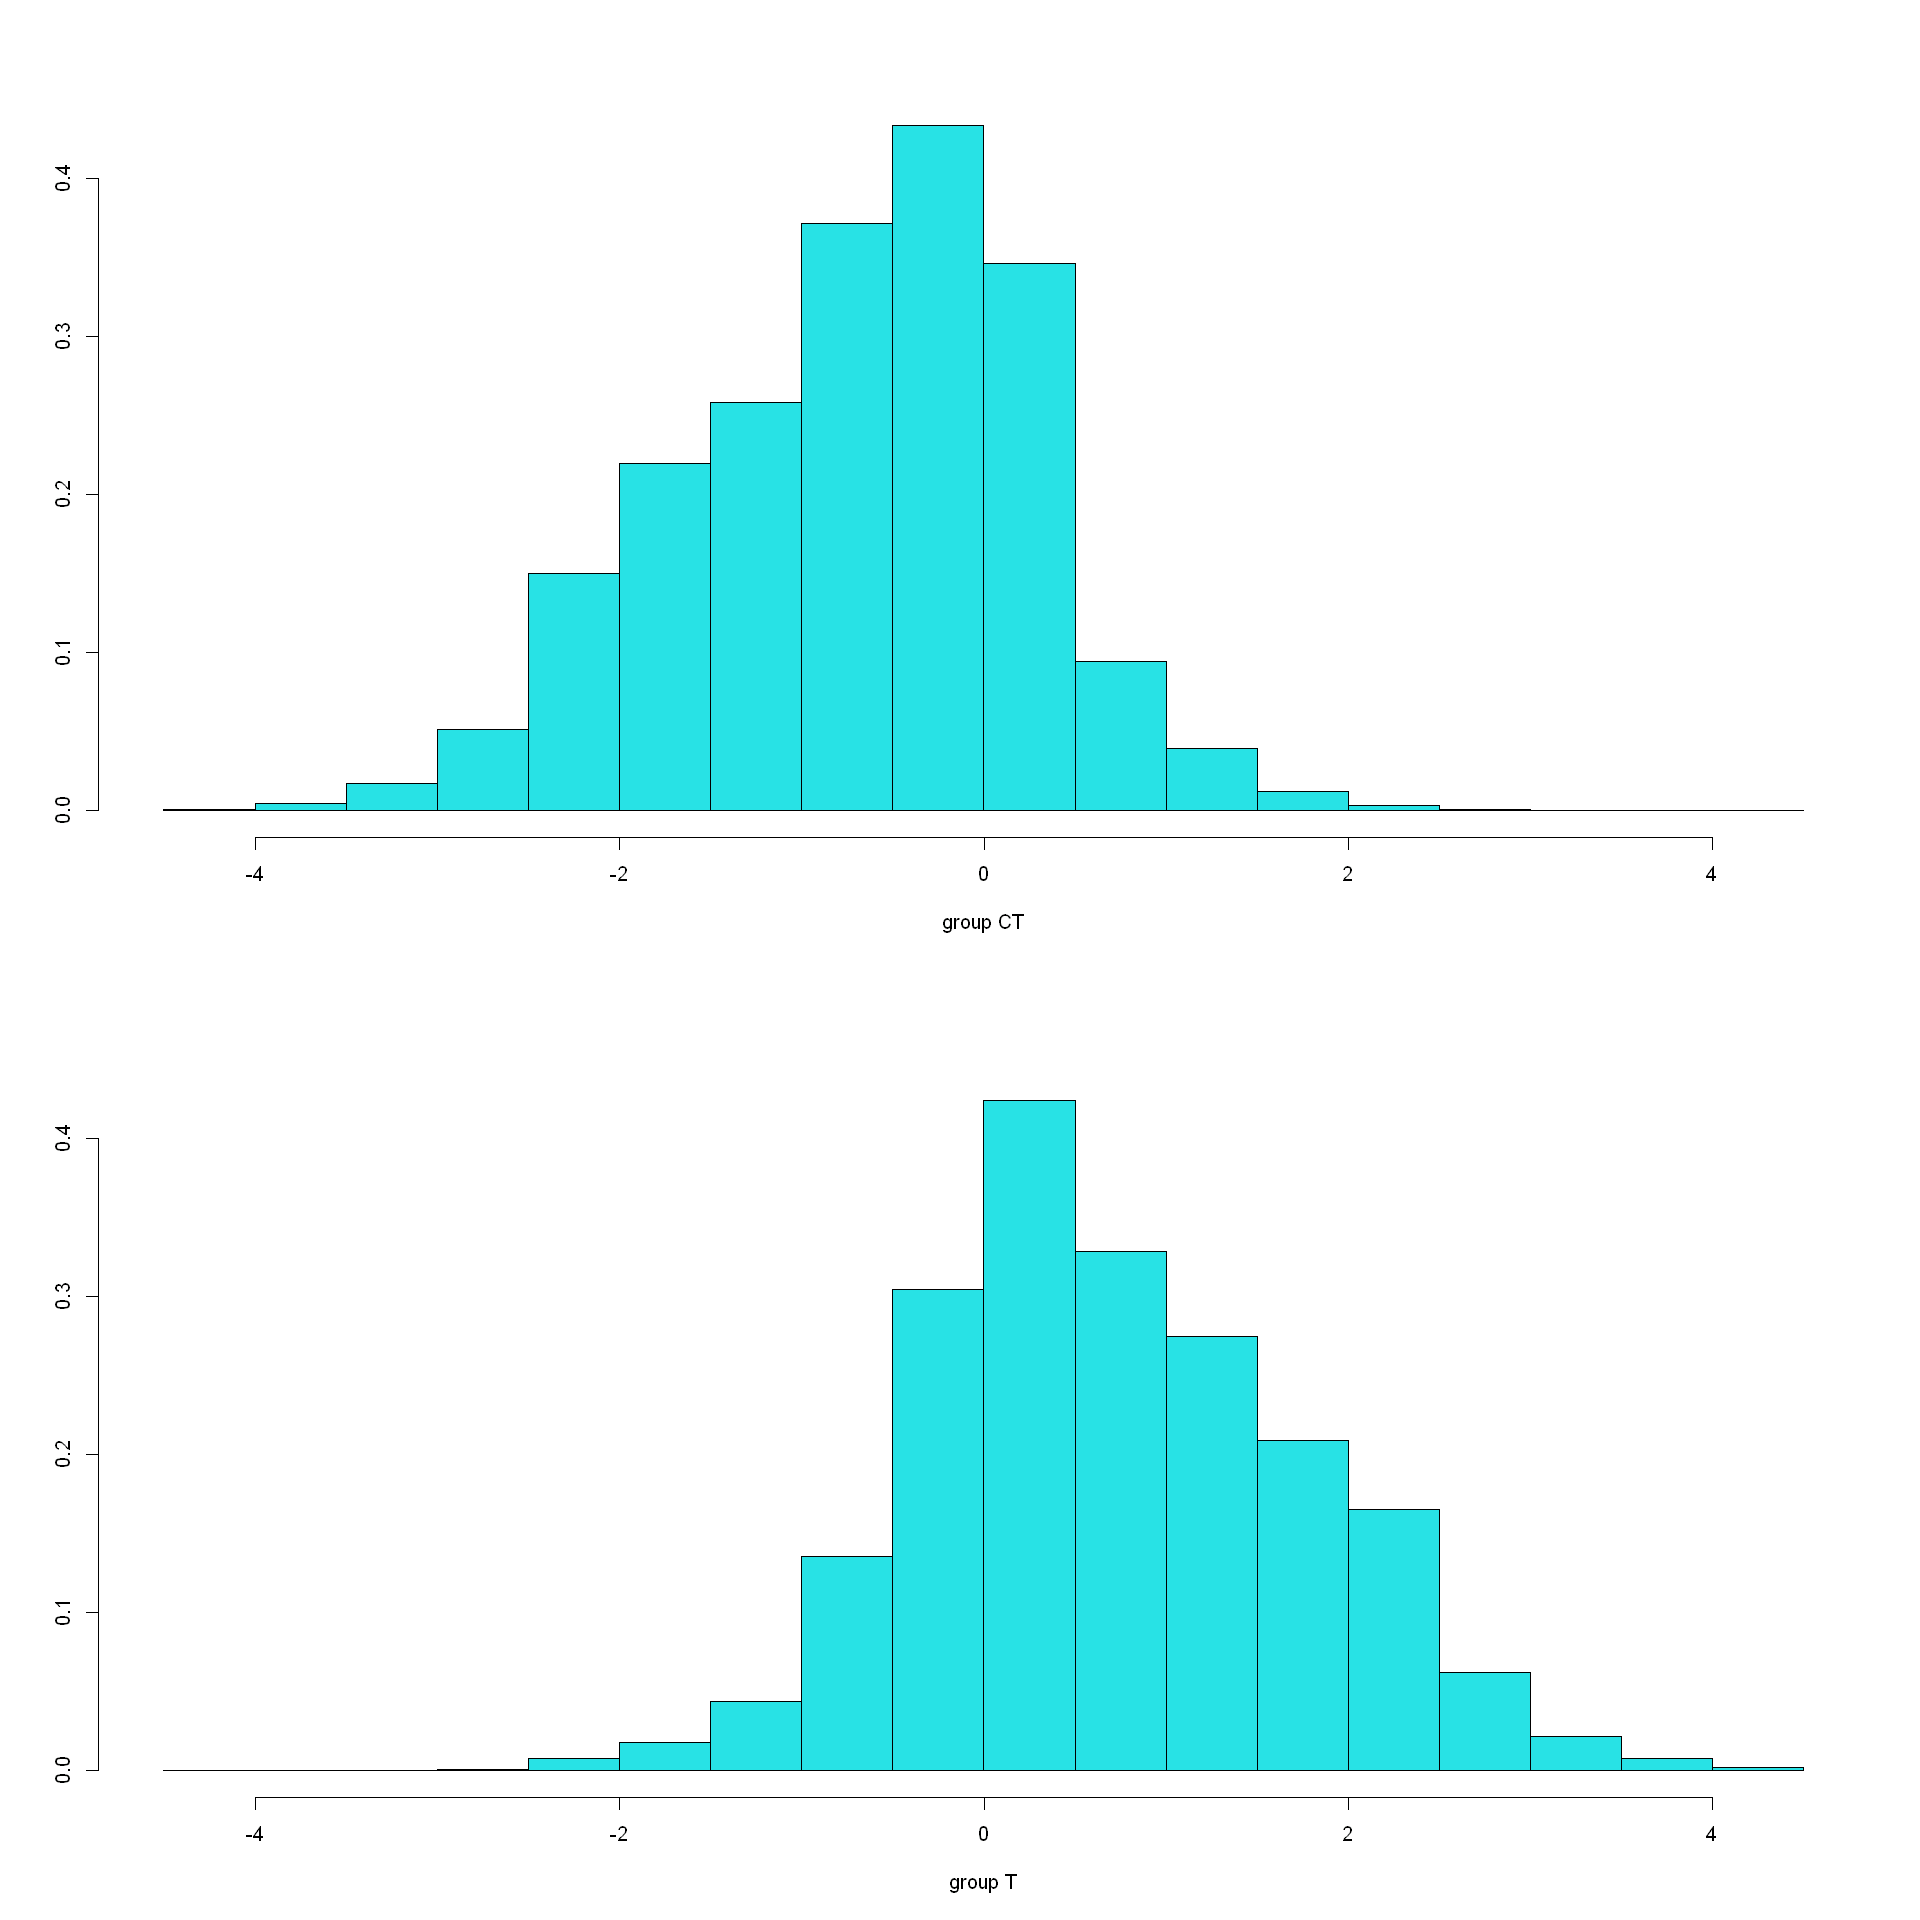

In [244]:
options(repr.plot.width=16, repr.plot.height=16) 
plot(lda.fit)

In [245]:
lda.pred <- predict(lda.fit, Dane_pred_norm)
names(lda.pred)
lda.class <- lda.pred$class

[1] "class"     "posterior" "x"

In [246]:
table(lda.class, Dane_pred_norm[,16])

         
lda.class   CT    T
       CT 6605 2243
       T  2391 7261

In [247]:
mean(lda.class == Dane_pred_norm[,16])

[1] 0.7495135

In [177]:
head(Dane)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,round_winner
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2364,53.70,15,12,de_vertigo,False,275,282,300,378,11050,650,2,4,3,3,T
8116,174.94,14,12,de_inferno,False,500,500,0,0,53300,20400,0,0,0,5,T
7861,114.96,0,9,de_dust2,False,500,500,500,482,800,41500,1,5,0,5,T
2858,114.89,5,2,de_train,False,500,500,495,488,9700,17350,3,5,3,5,CT
3132,174.95,8,11,de_dust2,False,500,500,291,362,9900,30000,1,4,0,5,T
3770,57.43,2,2,de_train,False,115,51,160,0,7550,2100,2,0,2,2,CT


### QDA

In [248]:
qda.fit <- qda(round_winner ~ ., data = Dane_norm)
qda.fit

Call:
qda(round_winner ~ ., data = Dane_norm)

Prior probabilities of groups:
       CT         T 
0.4844667 0.5155333 

Group means:
   time_left  ct_score   t_score mapde_dust2 mapde_inferno mapde_mirage
CT 0.5760836 0.2224740 0.2109837   0.1747626     0.1714600    0.1424247
T  0.5327827 0.2023956 0.2176023   0.1960429     0.2000517    0.1447045
   mapde_nuke mapde_overpass mapde_train mapde_vertigo bomb_plantedTrue
CT  0.1579744      0.1341682   0.1238475    0.09302326       0.05050227
T   0.1291866      0.1294452   0.1039700    0.09621104       0.17729212
   ct_health  t_health  ct_armor   t_armor  ct_money   t_money ct_helmets
CT 0.8739946 0.7748331 0.7509421 0.4961770 0.1420579 0.1258545  0.5349388
T  0.7693859 0.8244756 0.5171344 0.6942214 0.1057302 0.1548701  0.3030648
   t_helmets ct_defuse_kits ct_players_alive
CT 0.4388606      0.4233659        0.8835489
T  0.6725721      0.2335704        0.7491594

In [249]:
qda.class <- predict(qda.fit, Dane_pred_norm)$class
table(qda.class, Dane_pred_norm[,16])
mean(qda.class == Dane_pred_norm[,16])

         
qda.class   CT    T
       CT 6001 1810
       T  2995 7694

[1] 0.7402703

### Chyba tego mi się nie chce,idk

#### MDA

#### FDA

In [194]:
fda_model <- fda(Dane_norm, round_winner)

ERROR: Error in fda(Dane_norm, round_winner): nie udało się znaleźć funkcji 'fda'


#### RDA

In [195]:
rda.fit <- rda(round_winner ~ ., data = Dane_norm)

ERROR: Error in colMeans(x, na.rm = TRUE): argument 'x' musi być liczbą
